In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('agent_1_data.csv')

In [3]:
c = []
x_train = []
for i in range(len(df)):
    arr = np.fromstring(df['x'][i].replace('[', '').replace(']', ''), dtype=int, sep='\n').reshape(3,3)
    arr = arr/arr.max()
    c.append(np.asarray(arr))
x_train = np.asarray(c)
x_train = np.asarray(x_train)
x_train.shape
#     print(arr.shape)
#     print(arr)

(1113, 3, 3)

In [4]:
# c = []
# x_train = []
# for i in range(len(df)):
#     arr = []
# #     print(df['x'][i].replace('[', '').replace(']', '').split('\n'))
# #     print(len(df['x'][i].replace('[', '').replace(']', '').split('\n')))
    
#     for arr in df['x'][i].split('\n'):
#         arr = arr.replace('[', '').replace(']', '').split()
#         print(arr)
#         arr = [int(m) for m in arr]
#         arr = np.asarray(arr)
#         arr = arr/arr.max()
#         c.append(np.asarray(arr))
    
#     x_train.append(np.asarray(c))
# x_train = np.asarray(x_train)
# x_train.shape

In [5]:
out = []
for i in range(len(df)):
    a = df['y'][i].replace('[', '').replace(']', '').replace(',','').split()
    a = [int(m) for m in a]
    out.append(np.asarray(a))
y_train = out
y_train = np.asarray(out)
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [6]:
y_train.shape

(1113, 4)

In [7]:
y_test = y_train[0]
x_test = x_train[0]

In [8]:
a = []
for i in (y_train):
    row = list(i).index(1)
    a.append(row)
y_train = np.asarray(a)

    # y_train[0]

In [9]:
y_train.shape

(1113,)

In [10]:
#sequential is the basic model
model = tf.keras.models.Sequential()

# we add hidden layers into our network. 128 is the number of neurons that we use
# relu is a basic activation sigmoid function
# softmax is used for probability distribution (used in final/output layer with 10 neurons)
# we reduce 28x28 array to a flatten layer as it is multidimensional and hard to compute
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.softmax))

#parameters for training for the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

print('x_train', x_train.shape)
print('\ny_train', y_train.shape)
model.fit(x_train,y_train, epochs = 20)

x_train (1113, 3, 3)

y_train (1113,)
Epoch 1/20
35/35 [==============================] - 0s 1ms/step - loss: 1.0237 - accuracy: 0.5418 
Epoch 2/20
35/35 [==============================] - 0s 1ms/step - loss: 0.8017 - accuracy: 0.6056
Epoch 3/20
35/35 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.7179
Epoch 4/20
35/35 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.7565
Epoch 5/20
35/35 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7691
Epoch 6/20
35/35 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.7880
Epoch 7/20
35/35 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7969
Epoch 8/20
35/35 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7996
Epoch 9/20
35/35 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8338
Epoch 10/20
35/35 [==============================] - 0s 1ms/step - loss: 0.4144

In [11]:
x_test = np.asarray([x_test])

In [12]:
# calculate the validation loss
val_loss, val_accuracy = model.evaluate(x_train, np.asarray(y_train))
print(val_loss, val_accuracy)

35/35 [==============================] - 0s 869us/step - loss: 0.1749 - accuracy: 0.9704
0.17491477727890015 0.9703503847122192


In [13]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [15]:
x_test.shape

(1, 3, 3)

In [16]:
x_test

array([[[0.25, 0.75, 0.75],
        [0.25, 0.75, 0.75],
        [1.  , 0.5 , 0.75]]])

In [17]:
predictions = new_model.predict(x_test)

In [18]:
print(predictions[0])
print(predictions[0].max())

[7.5400237e-04 1.1250562e-01 9.8992197e-05 8.8664138e-01]
0.8866414


In [19]:
def get_children(x, y, n, visited_list):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y),#down
                   (x-1,y),#up
                   (x,y+1),#right
                   (x,y-1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))
    allChildren = [node for node in allChildren if node[:2] not in visited_list]

    return allChildren

In [20]:
# next_move((0,0), np.asarray([[0.1947099 , 0.3240646,  0.27810824, 0.20311731]]))

In [21]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """
    global block_unblock_matrix
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    block_unblock_matrix = np.asmatrix(np_array)

    ############testing on hard coded matrix ###########
#     block_unblock_matrix = [[0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 1, 0, 0, 0],
#             [1, 0, 0, 1, 0]]
#     ######################################
#     populateMatrix(n,p)
    block_unblock_matrix = np.matrix(block_unblock_matrix)
    plt.spy(block_unblock_matrix)
    return block_unblock_matrix


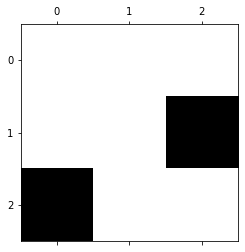

In [22]:
maze_size = 3
agent_grid_world = np.full((maze_size, maze_size),3)
agent_grid_world = np.asmatrix(agent_grid_world)
full_grid_world = populateMatrix(maze_size, 0.3)
plt.spy(full_grid_world)

In [23]:
def next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag):
    message = ''
    if flag == 'blocked':
        if trajectory:
            return trajectory[-1], message
        else:
            return trajectory[-1], "Can't reach goal"

    print('current_node -- (next_move)', current_node)
    indices = zip(np.where(predictions[0] == predictions[0].max()))

#     print(predictions[0])
    for row in indices:
        print(row)
        if row[0][0] == 0:
            message = 'up'
            print(message)
            next_node = (current_node[0] - 1, current_node[1])
        elif row[0][0] == 1:
            message = 'down'
            print(message)
            next_node = (current_node[0] + 1, current_node[1])
        elif row[0][0] == 2:
            message = 'left'
            print(message)
            next_node = (current_node[0], current_node[1] - 1)
        elif row[0][0] == 3:
            message = 'right'
            print(message)
            next_node = (current_node[0], current_node[1] + 1)
#     print("#####")
#     print('next_node -- (next_move)', next_node)

#     if agent_grid_world[next_node] == 2:
#         print('current_node:::: ', current_node)
#         if message == 'down':
#             next_node = (current_node[0], current_node[1] + 1)
#             message = 'right'
#             print(' The direction changed to ', message)
#         elif message == 'right':
#             next_node = (current_node[0] + 1, current_node[1])
#             message = 'down'
#             print(' The direction changed to ', message)
#         print('next_node',next_node)

    try:
        print(full_grid_world.item(next_node))
#         print('##########')
#         print('next_node -- (next_move 2)', next_node)
        if next_node not in visited_list:
            return next_node, message
        else:
            children = get_children(current_node[0], current_node[1], maze_size, visited_list)
            for i in children:
                if i not in visited_list:
                    return i, message
                else:
                    returni, "Can't reach goal"
    except Exception as err:
        print(err)
        children = get_children(current_node[0], current_node[1], maze_size, visited_list)
        for i in children:
            if i not in visited_list:
                return i, message
            else:
                return i , "Can't reach goal"
        return children[-1], message

In [24]:
def get_neighbors(row, col, n):
    dir = [[-1, -1], [-1, 0],[-1, 1], [0, -1], [0, 0],  [0, 1], [1, -1], [1, 0], [1, 1]]
    friend = []
    count = 0
    for x, y in dir:
        row_new = row + x
        col_new = col + y
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            count += 1
            friend.append((row_new, col_new))
    return count, friend

In [25]:
def get_window(current_node, agent_grid_world):
    a = []
    count, neighbors = get_neighbors(current_node[0],current_node[1], maze_size)

    if len(neighbors) == 4:
        if current_node == (0,0):
            count, neighbors = get_neighbors(1,1, maze_size)
        elif current_node == (0,maze_size-1):
            count, neighbors = get_neighbors(1,maze_size-2, maze_size)
        elif current_node == (maze_size-1,0):
            count, neighbors = get_neighbors(maze_size-2, 1, maze_size)
        elif current_node == (maze_size-1,maze_size-1):
            count, neighbors = get_neighbors(maze_size-2,maze_size-2, maze_size)
    elif len(neighbors) == 6:
        if current_node[0] == 0:
            count, neighbors = get_neighbors(current_node[0] + 1,current_node[1], maze_size)
        elif current_node[0] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0] - 1,current_node[1], maze_size)
        elif current_node[1] == 0:
            count, neighbors = get_neighbors(current_node[0],current_node[1] + 1, maze_size)
        elif current_node[1] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0],current_node[1] - 1, maze_size)
    for i in neighbors:
        print(i)
        a.append(agent_grid_world[i])
    window = np.asarray(a).reshape(3,3)

    return window

In [26]:
goal_reached = False
new_model = tf.keras.models.load_model('epic_num_reader.model')

start = (0,0)
goal = (maze_size-1, maze_size-1)
agent_grid_world.itemset(start, 4)
current_node = start
visited_list = []
trajectory = []

while goal_reached == False:
    trajectory.append(current_node)
    if current_node == goal:
        print('Goal reached!!!')
        goal_reached = True

    if current_node not in visited_list:
        visited_list.append(current_node)

    x_test = get_window(current_node, agent_grid_world)
    print(x_test)
    x_test = np.asarray(x_test)

    predictions = new_model.predict(np.asarray([x_test]))

    if full_grid_world.item(current_node) == 1:
        trajectory.pop(-1)
        agent_grid_world.itemset(current_node, 2)
        flag = 'blocked'
        print(flag)
    else:
        agent_grid_world.itemset(current_node, 1)
        flag = 'free'
        print(flag)
    
    try:
        next_node, message = next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag)
    except Exception as err:
        print('No path to goal')
        break
    print('next_node out',next_node)
    print('message', message)
    if message == "Can't reach goal":
        print('Cannot reach goal')
        break

    if flag == 'blocked':
        print('current_node:::: ', current_node)
        if message == 'down':
            next_node = (current_node[0], current_node[1] + 1)
            message = 'right'
            print(' The direction changed to ', message)
        elif message == 'right':
            next_node = (current_node[0] + 1, current_node[1])
            message = 'down'
            print(' The direction changed to ', message)
        print('next_node',next_node)
        agent_grid_world.itemset(current_node, 2)
        current_node = trajectory[-1]

#     agent_grid_world.itemset(current_node, 1)
    current_node = next_node
    agent_grid_world.itemset(current_node, 4)

#     print('agent_grid', agent_grid_world)
    print(visited_list)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
[[4 3 3]
 [3 3 3]
 [3 3 3]]
free
current_node -- (next_move) (0, 0)
(array([1], dtype=int64),)
down
0
next_node out (1, 0)
message down
[(0, 0)]
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (1, 0)
(array([1], dtype=int64),)
down
1
next_node out (2, 0)
message down
[(0, 0), (1, 0)]
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
[[1 3 3]
 [1 3 3]
 [4 3 3]]
blocked
next_node out (1, 0)
message 
current_node::::  (2, 0)
next_node (1, 0)
[(0, 0), (1, 0), (2, 0)]
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
[[1 3 3]
 [4 3 3]
 [2 3 3]]
free
current_node -- (next_move) (1, 0)
(array([1], dtype=int64),)
down
1
next_node out (1, 1)
message down
[(0, 0), (1, 0), (2, 0)]
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
[[1 3 3]
 [1 4 3]
 [2 3 3]]
free
current_node -- (next_move) (1, 1)
(array([1], dtype=int64),

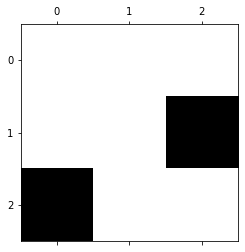

In [27]:
plt.spy(full_grid_world)